# NAIVE BAYES


In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , precision_recall_curve , f1_score
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [40]:
df = pd.read_csv("C:\\Users\\nex20\\OneDrive\\Documents\\machine learning\\titanic\\train_and_test2.csv")

In [41]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [42]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [43]:
df = df.drop(columns = 'Embarked')

In [44]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [45]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.294882,0.0,0.0,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.837836,0.0,0.0,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,1.000000


In [46]:
df.size

35343

In [47]:
df.columns 

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'zero.17', 'zero.18',
       '2urvived'],
      dtype='object')

In [48]:
correlation = df.corr()

<Axes: >

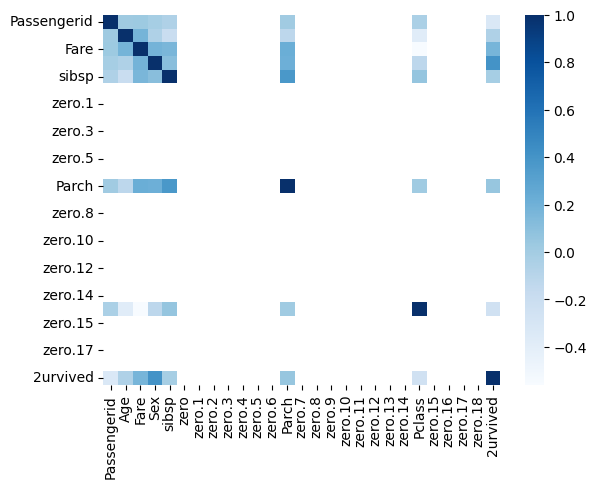

In [49]:
sns.heatmap(correlation , cmap = 'Blues')

# splitting data 

In [50]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'zero.17', 'zero.18',
       '2urvived'],
      dtype='object')

In [51]:
df.drop(['Passengerid' , 'sibsp' , 'Parch'] , inplace = True , axis = 1)

In [52]:
df.head()

,Age,Fare,Sex,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,2urvived
0,22.0,7.2500,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1,38.0,71.2833,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,1
3,35.0,53.1000,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,35.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


In [53]:
df.columns

Index(['Age', 'Fare', 'Sex', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4',
       'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11',
       'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16',
       'zero.17', 'zero.18', '2urvived'],
      dtype='object')

In [54]:
df = df[['Age','Fare','Sex','Pclass','2urvived']]

In [55]:
df

,Age,Fare,Sex,Pclass,2urvived
0,22.0,7.2500,0,3,0
1,38.0,71.2833,1,1,1
2,26.0,7.9250,1,3,1
3,35.0,53.1000,1,1,1
4,35.0,8.0500,0,3,0
...,...,...,...,...,...
1304,28.0,8.0500,0,3,0
1305,39.0,108.9000,1,1,0
1306,38.5,7.2500,0,3,0
1307,28.0,8.0500,0,3,0


In [56]:
df.rename(columns={'2urvived': 'survived'}, inplace=True)


In [57]:
df

,Age,Fare,Sex,Pclass,survived
0,22.0,7.2500,0,3,0
1,38.0,71.2833,1,1,1
2,26.0,7.9250,1,3,1
3,35.0,53.1000,1,1,1
4,35.0,8.0500,0,3,0
...,...,...,...,...,...
1304,28.0,8.0500,0,3,0
1305,39.0,108.9000,1,1,0
1306,38.5,7.2500,0,3,0
1307,28.0,8.0500,0,3,0


In [59]:
X = df.drop('survived' , axis = 1)
y = df.survived

In [61]:
X.head()

,Age,Fare,Sex,Pclass
0,22.0,7.2500,0,3
1,38.0,71.2833,1,1
2,26.0,7.9250,1,3
3,35.0,53.1000,1,1
4,35.0,8.0500,0,3


In [62]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

In [65]:
X_train.head()

,Age,Fare,Sex,Pclass
1036,31.0,18.0000,0,3
401,26.0,8.0500,0,3
360,40.0,27.9000,0,3
1019,42.0,13.0000,0,2
1209,27.0,7.8542,0,3


In [66]:
y_train.head()

1036    0
401     0
360     0
1019    0
1209    0
Name: survived, dtype: int64

In [67]:
naive = GaussianNB()
naive.fit(X_train , y_train)

GaussianNB()

In [68]:
naive.score(X_train , y_train)

0.758266818700114

In [69]:
naive.score(X_test , y_test)

0.7638888888888888

<Axes: xlabel='Sex', ylabel='Density'>

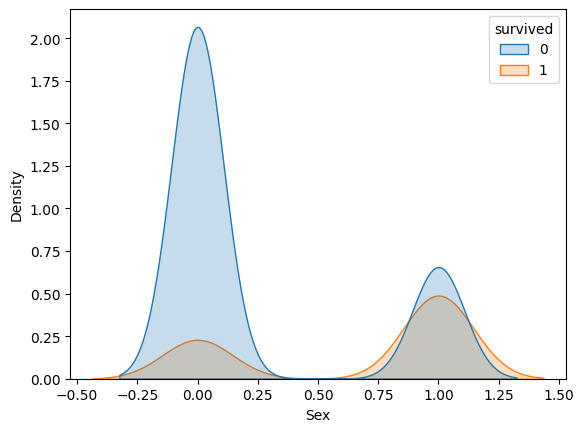

In [70]:
sns.kdeplot(data=df, x='Sex', hue='survived', fill=True)

In [71]:
X_train.head()

,Age,Fare,Sex,Pclass
1036,31.0,18.0000,0,3
401,26.0,8.0500,0,3
360,40.0,27.9000,0,3
1019,42.0,13.0000,0,2
1209,27.0,7.8542,0,3


<Axes: xlabel='Fare', ylabel='Density'>

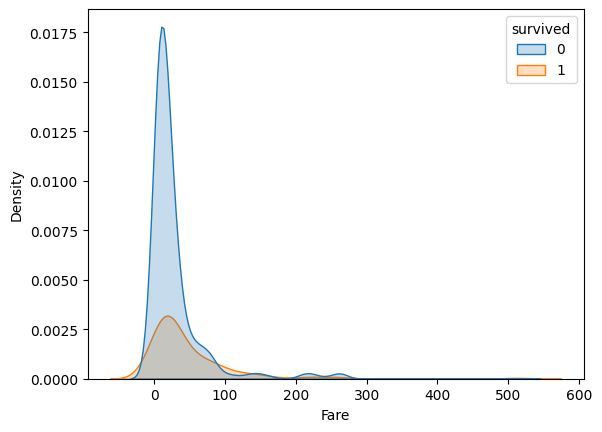

In [72]:
sns.kdeplot(data=df, x='Fare', hue='survived', fill=True)

<Axes: xlabel='Pclass', ylabel='Density'>

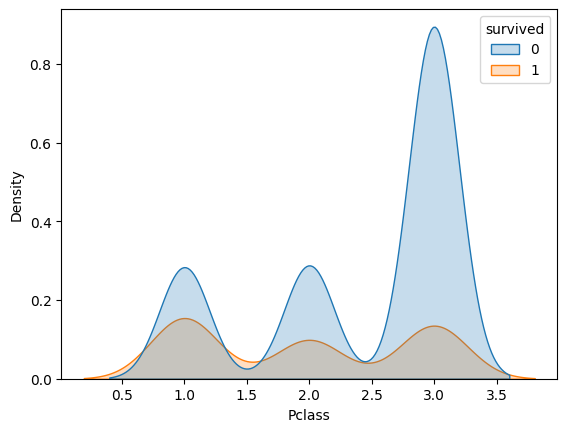

In [74]:
sns.kdeplot(data=df, x='Pclass', hue='survived', fill=True)

<Axes: xlabel='Age', ylabel='Density'>

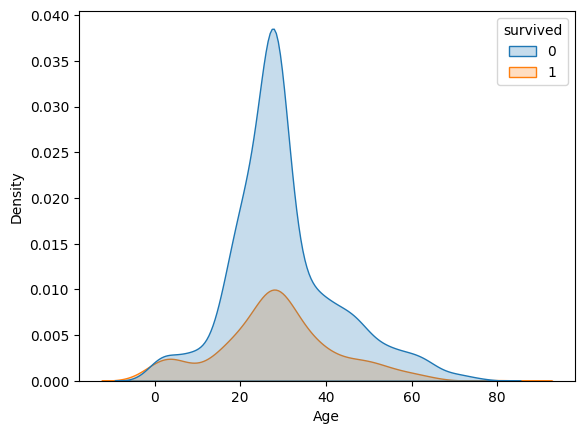

In [75]:
sns.kdeplot(data=df, x='Age', hue='survived', fill=True)

In [77]:
y_pred = naive.predict(X_test)

In [78]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [79]:
accuracy_score(y_pred , y_test)

0.7638888888888888

In [84]:
naive.predict_proba(X_test)

array([[8.47900190e-01, 1.52099810e-01],
       [9.29214826e-01, 7.07851740e-02],
       [9.55871476e-01, 4.41285236e-02],
       [9.56121125e-01, 4.38788754e-02],
       [3.12821743e-01, 6.87178257e-01],
       [8.53306018e-01, 1.46693982e-01],
       [9.53006955e-01, 4.69930450e-02],
       [9.29958228e-01, 7.00417719e-02],
       [7.14997212e-01, 2.85002788e-01],
       [9.65798441e-04, 9.99034202e-01],
       [6.89907922e-01, 3.10092078e-01],
       [9.48145766e-01, 5.18542336e-02],
       [9.19020615e-01, 8.09793850e-02],
       [8.47466298e-01, 1.52533702e-01],
       [9.54078330e-01, 4.59216697e-02],
       [8.49705957e-01, 1.50294043e-01],
       [9.53200596e-01, 4.67994039e-02],
       [8.55676925e-01, 1.44323075e-01],
       [9.55805502e-01, 4.41944983e-02],
       [7.14684013e-01, 2.85315987e-01],
       [6.25186945e-01, 3.74813055e-01],
       [9.50355952e-01, 4.96440482e-02],
       [6.83663485e-01, 3.16336515e-01],
       [8.37066980e-01, 1.62933020e-01],
       [9.172152

In [93]:
crossvalscore = cross_val_score(naive ,X_train ,y_train , cv = 5)


In [94]:
crossvalscore

array([0.72727273, 0.75568182, 0.75428571, 0.74857143, 0.78857143])

In [101]:
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # These are example values, adjust as needed
}
classifier_naive = GridSearchCV(naive , param_grid = parameters , scoring = 'accuracy' , cv = 10)

In [102]:
classifier_naive.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [103]:
classifier_naive.best_params_

{'var_smoothing': 1e-06}

In [106]:
classifier_naive.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')>

In [108]:
classifier_naive.best_score_

0.754898119122257

In [ ]:
# BEST ACCURACY SCORE I S